# Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_bln1 = pd.read_csv("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/2020_forbes_billionaires.csv")
df_bln2 = pd.read_csv("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/2021_forbes_billionaires.csv")
df_bln3 = pd.read_csv("/content/drive/MyDrive/BTL-KPDL/Forbes Billionaires n Companies/2022_forbes_billionaires.csv")

In [ ]:
df_bln1.rename(columns = {'Country/Territory':'Country'}, inplace = True)
df_bln1 = df_bln1.drop(columns=['Rank', 'Name'])
df_bln1

,Net Worth,Age,Country,Source,Industries
0,$113 B,56.0,United States,Amazon,Technology
1,$98 B,64.0,United States,Microsoft,Technology
2,$76 B,71.0,France,LVMH,Fashion & Retail
3,$67.5 B,89.0,United States,Berkshire Hathaway,Finance & Investments
4,$59 B,75.0,United States,software,Technology
...,...,...,...,...,...
2090,$1 B,54.0,China,glass,Manufacturing
2091,$1 B,55.0,China,apparel,Fashion & Retail
2092,$1 B,45.0,China,software,Technology
2093,$1 B,46.0,Ukraine,mining,Metals & Mining


In [ ]:
df_bln2.rename(columns = {'Industry':'Industries', 'NetWorth': 'Net Worth'}, inplace = True)
df_bln2 = df_bln2.drop(columns=['Rank','Name'])

df_bln2

,Net Worth,Country,Source,Age,Industries
0,$177 B,United States,Amazon,57.0,Technology
1,$151 B,United States,"Tesla, SpaceX",49.0,Automotive
2,$150 B,France,LVMH,72.0,Fashion & Retail
3,$124 B,United States,Microsoft,65.0,Technology
4,$97 B,United States,Facebook,36.0,Technology
...,...,...,...,...,...
2750,$1 B,China,e-commerce,49.0,Technology
2751,$1 B,China,Fiberglass,65.0,Manufacturing
2752,$1 B,China,gold mining,58.0,Metals & Mining
2753,$1 B,China,conglomerate,58.0,Diversified


In [ ]:
df_bln3.rename(columns = {'industry':'Industries', 'networth': 'Net Worth', 'age':'Age', 'country':'Country',
                          'source':'Source'}, inplace = True)
df_bln3 = df_bln3.drop(columns=['Unnamed: 0', 'rank','name'])

df_bln3

,Net Worth,Age,Country,Source,Industries
0,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,$171 B,58,United States,Amazon,Technology
2,$158 B,73,France,LVMH,Fashion & Retail
3,$129 B,66,United States,Microsoft,Technology
4,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...
2595,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,$1 B,82,Philippines,apparel,Fashion & Retail
2597,$1 B,71,Philippines,apparel,Fashion & Retail
2598,$1 B,68,Philippines,garments,Fashion & Retail


In [ ]:
# Tính toán dữ liệu null
df_bln1.isnull().sum()

Net Worth      0
Age           43
Country        0
Source         0
Industries     0
dtype: int64

In [ ]:
# show dữ liệu null
cols_nul=['Net Worth','Age']
df_bln1[df_bln1.isnull().any(axis=1)][cols_nul]

,Net Worth,Age
22,$33.3 B,NaN
90,$12.9 B,NaN
113,$11.3 B,NaN
122,$10.9 B,NaN
132,$10.2 B,NaN
152,$9 B,NaN
237,$6.4 B,NaN
321,$5.1 B,NaN
331,$5 B,NaN
425,$4.2 B,NaN


In [ ]:
df_bln1.fillna(df_bln1.mean(), inplace = True)

df_bln1.isnull().sum()

<ipython-input-11-db1a26f38617>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bln1.fillna(df_bln1.mean(), inplace = True)


Net Worth     0
Age           0
Country       0
Source        0
Industries    0
dtype: int64

In [ ]:
df_bln1['Source'].replace({'.com': '', 'power strips': 'power strip', 'airlines':'airline', 'airports': 'airport', 'aluminum products':'aluminum',
                           'art collection':'art','auto dealerships':'auto dealers', 'automotive technology':'automotive',
                           '/':',', 'chemical':'chemicals','coal mines':'coal mining', 'ecommerce':'e-commerce', 'EstÃ©e Lauder':'Estee Lauder',
                           'fashion retailer':'fashion retail','and':',','investing':'investments', 'Investment':'Investments','jewellery':'jewelry',
                           'liquor stores':'liquor','&':',','paint':'paints','paper':'papers','pharmacy':'pharmacies','retailing':'retail',
                           'semiconductor':'semiconductors','sports team':'sports teams','steel production':'steel','transportation':'transport'})


0                   Amazon
1                Microsoft
2                     LVMH
3       Berkshire Hathaway
4                 software
               ...        
2090                 glass
2091               apparel
2092              software
2093                mining
2094          conglomerate
Name: Source, Length: 2095, dtype: object

In [ ]:
# Tính toán dữ liệu null
df_bln2.isnull().sum()

Net Worth      0
Country        0
Source         0
Age           79
Industries     0
dtype: int64

In [ ]:
df_bln2.fillna(df_bln1.mean(), inplace = True)

df_bln2.isnull().sum()

<ipython-input-14-c5d7a00c3b3f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bln2.fillna(df_bln1.mean(), inplace = True)


Net Worth     0
Country       0
Source        0
Age           0
Industries    0
dtype: int64

In [ ]:
# Tính toán dữ liệu null
df_bln3.isnull().sum()

Net Worth     0
Age           0
Country       0
Source        0
Industries    0
dtype: int64

In [ ]:
df_bln3.fillna(df_bln1.mean(), inplace = True)

df_bln3.isnull().sum()

<ipython-input-16-f09fe4cfe4cd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bln3.fillna(df_bln1.mean(), inplace = True)


Net Worth     0
Age           0
Country       0
Source        0
Industries    0
dtype: int64

In [ ]:
# Chuyển đổi hàm -> B
def convert_net_worth_to_number(net_worth):
    value = float(net_worth.replace('$', '').replace('B', '').replace('M', ''))
    if 'B' in net_worth:
        return value;

# Áp dụng chuyển đổi cho cột 'Net Worth'
df_bln1['Net Worth'] = df_bln1['Net Worth'].apply(convert_net_worth_to_number)
df_bln2['Net Worth'] = df_bln2['Net Worth'].apply(convert_net_worth_to_number)
df_bln3['Net Worth'] = df_bln3['Net Worth'].apply(convert_net_worth_to_number)

# Hiển thị kết quả
df_bln1

,Net Worth,Age,Country,Source,Industries
0,113.0,56.0,United States,Amazon,Technology
1,98.0,64.0,United States,Microsoft,Technology
2,76.0,71.0,France,LVMH,Fashion & Retail
3,67.5,89.0,United States,Berkshire Hathaway,Finance & Investments
4,59.0,75.0,United States,software,Technology
...,...,...,...,...,...
2090,1.0,54.0,China,glass,Manufacturing
2091,1.0,55.0,China,apparel,Fashion & Retail
2092,1.0,45.0,China,software,Technology
2093,1.0,46.0,Ukraine,mining,Metals & Mining


In [ ]:
df_bln2

,Net Worth,Country,Source,Age,Industries
0,177.0,United States,Amazon,57.0,Technology
1,151.0,United States,"Tesla, SpaceX",49.0,Automotive
2,150.0,France,LVMH,72.0,Fashion & Retail
3,124.0,United States,Microsoft,65.0,Technology
4,97.0,United States,Facebook,36.0,Technology
...,...,...,...,...,...
2750,1.0,China,e-commerce,49.0,Technology
2751,1.0,China,Fiberglass,65.0,Manufacturing
2752,1.0,China,gold mining,58.0,Metals & Mining
2753,1.0,China,conglomerate,58.0,Diversified


In [ ]:
df_bln3

,Net Worth,Age,Country,Source,Industries
0,219.0,50,United States,"Tesla, SpaceX",Automotive
1,171.0,58,United States,Amazon,Technology
2,158.0,73,France,LVMH,Fashion & Retail
3,129.0,66,United States,Microsoft,Technology
4,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...
2595,1.0,80,Spain,pharmaceuticals,Healthcare
2596,1.0,82,Philippines,apparel,Fashion & Retail
2597,1.0,71,Philippines,apparel,Fashion & Retail
2598,1.0,68,Philippines,garments,Fashion & Retail


**Thống kê 2020**

In [ ]:
# Sắp xếp theo cột Net Worth giảm dần
df_sorted = df_bln1.sort_values(by='Net Worth', ascending=False)
# In ra danh sách công ty có Net Worth cao nhất
print(df_sorted.head())

In [ ]:
# Tính tổng giá trị Net Worth của tất cả công ty
total_net_worth = df_bln1['Net Worth'].sum()
print("Tổng Net Worth của tất cả công ty:", total_net_worth)

# Tính giá trị trung bình (mean) của Net Worth
mean_net_worth = df_bln1['Net Worth'].mean()
print("Giá trị trung bình của Net Worth:", mean_net_worth)

# Tìm công ty có Net Worth cao nhất
max_net_worth_country = df_bln1.loc[df_bln1['Net Worth'].idxmax(), 'Country']
print("Công ty có Net Worth cao nhất theo country:", max_net_worth_country)

# Tìm công ty có Net Worth thấp nhất
min_net_worth_company = df_bln1.loc[df_bln1['Net Worth'].idxmin(), 'Country']
print("Công ty có Net Worth thấp nhất:", min_net_worth_company)

In [ ]:
# Tạo một DataFrame mới với tổng Net Worth của từng quốc gia
df_country_net_worth = df_bln1.groupby('Country')['Net Worth'].sum().reset_index()

# Sắp xếp theo cột Net Worth giảm dần
df_sorted = df_country_net_worth.sort_values(by='Net Worth', ascending=False)

# Hiển thị quốc gia có nhiều tỷ phú nhất
most_philanthropic_country = df_sorted.iloc[0]['Country']
print("Quốc gia có nhiều tỷ phú nhất:", most_philanthropic_country)

count_philanthropists = df_bln1[df_bln1['Country'] == most_philanthropic_country].shape[0]

print("Số lượng tỷ phú của quốc gia", most_philanthropic_country, "là:", count_philanthropists)

In [ ]:
import matplotlib.pyplot as plt

# Thống kê số lượng tỷ phú theo quốc gia
df_country_philanthropists = df_bln1.groupby('Country')['Net Worth'].count().reset_index()

# Đổi tên cột Net Worth thành 'Số lượng tỷ phú'
df_country_philanthropists.rename(columns={'Net Worth': 'Number of Philanthropists'}, inplace=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 6))
plt.bar(df_country_philanthropists['Country'], df_country_philanthropists['Number of Philanthropists'])
plt.xlabel('Country')
plt.ylabel('Số lượng')
plt.title('Số lượng tỷ phú theo quốc gia')
plt.xticks(rotation=90)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Thống kê 2021**

In [ ]:
# Sắp xếp theo cột Net Worth giảm dần
df2_sorted = df_bln2.sort_values(by='Net Worth', ascending=False)
# In ra danh sách công ty có Net Worth cao nhất
print(df2_sorted.head())

In [ ]:
# Tính tổng giá trị Net Worth của tất cả công ty
total_net_worth2 = df_bln2['Net Worth'].sum()
print("Tổng Net Worth của tất cả công ty:", total_net_worth2)

# Tính giá trị trung bình (mean) của Net Worth
mean_net_worth2 = df_bln2['Net Worth'].mean()
print("Giá trị trung bình của Net Worth:", mean_net_worth2)

# Tìm công ty có Net Worth cao nhất
max_net_worth_country2 = df_bln2.loc[df_bln2['Net Worth'].idxmax(), 'Country']
print("Công ty có Net Worth cao nhất theo country:", max_net_worth_country2)

# Tìm công ty có Net Worth thấp nhất
min_net_worth_company2 = df_bln2.loc[df_bln2['Net Worth'].idxmin(), 'Country']
print("Công ty có Net Worth thấp nhất:", min_net_worth_company2)

In [ ]:
# Tạo một DataFrame mới với tổng Net Worth của từng quốc gia
df_country_net_worth2 = df_bln2.groupby('Country')['Net Worth'].sum().reset_index()

# Sắp xếp theo cột Net Worth giảm dần
df2_sorted = df_country_net_worth2.sort_values(by='Net Worth', ascending=False)

# Hiển thị quốc gia có nhiều tỷ phú nhất
most_philanthropic_country2 = df2_sorted.iloc[0]['Country']
print("Quốc gia có nhiều tỷ phú nhất:", most_philanthropic_country2)

count_philanthropists2 = df_bln2[df_bln2['Country'] == most_philanthropic_country2].shape[0]

print("Số lượng tỷ phú của quốc gia", most_philanthropic_country2, "là:", count_philanthropists2)

In [ ]:
import matplotlib.pyplot as plt

# Thống kê số lượng tỷ phú theo quốc gia
df_country_philanthropists2 = df_bln2.groupby('Country')['Net Worth'].count().reset_index()

# Đổi tên cột Net Worth thành 'Số lượng tỷ phú'
df_country_philanthropists2.rename(columns={'Net Worth': 'Number of Philanthropists'}, inplace=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 6))
plt.bar(df_country_philanthropists2['Country'], df_country_philanthropists2['Number of Philanthropists'])
plt.xlabel('Country')
plt.ylabel('Số lượng')
plt.title('Số lượng tỷ phú theo quốc gia')
plt.xticks(rotation=90)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

**Thống kê 2022**

In [ ]:
# Sắp xếp theo cột Net Worth giảm dần
df3_sorted = df_bln3.sort_values(by='Net Worth', ascending=False)
# In ra danh sách công ty có Net Worth cao nhất
print(df3_sorted.head())

In [ ]:
# Tính tổng giá trị Net Worth của tất cả công ty
total_net_worth3 = df_bln3['Net Worth'].sum()
print("Tổng Net Worth của tất cả công ty:", total_net_worth3)

# Tính giá trị trung bình (mean) của Net Worth
mean_net_worth3 = df_bln3['Net Worth'].mean()
print("Giá trị trung bình của Net Worth:", mean_net_worth3)

# Tìm công ty có Net Worth cao nhất
max_net_worth_country3 = df_bln3.loc[df_bln3['Net Worth'].idxmax(), 'Country']
print("Công ty có Net Worth cao nhất theo country:", max_net_worth_country3)

# Tìm công ty có Net Worth thấp nhất
min_net_worth_company3 = df_bln3.loc[df_bln3['Net Worth'].idxmin(), 'Country']
print("Công ty có Net Worth thấp nhất:", min_net_worth_company3)

In [ ]:
# Tạo một DataFrame mới với tổng Net Worth của từng quốc gia
df_country_net_worth3 = df_bln3.groupby('Country')['Net Worth'].sum().reset_index()

# Sắp xếp theo cột Net Worth giảm dần
df3_sorted = df_country_net_worth3.sort_values(by='Net Worth', ascending=False)

# Hiển thị quốc gia có nhiều tỷ phú nhất
most_philanthropic_country3 = df3_sorted.iloc[0]['Country']
print("Quốc gia có nhiều tỷ phú nhất:", most_philanthropic_country3)

count_philanthropists3 = df_bln3[df_bln3['Country'] == most_philanthropic_country3].shape[0]

print("Số lượng tỷ phú của quốc gia", most_philanthropic_country3, "là:", count_philanthropists3)

In [ ]:
import matplotlib.pyplot as plt

# Thống kê số lượng tỷ phú theo quốc gia
df_country_philanthropists3 = df_bln3.groupby('Country')['Net Worth'].count().reset_index()

# Đổi tên cột Net Worth thành 'Số lượng tỷ phú'
df_country_philanthropists3.rename(columns={'Net Worth': 'Number of Philanthropists'}, inplace=True)

# Vẽ biểu đồ cột
plt.figure(figsize=(20, 6))
plt.bar(df_country_philanthropists3['Country'], df_country_philanthropists3['Number of Philanthropists'])
plt.xlabel('Country')
plt.ylabel('Số lượng')
plt.title('Số lượng tỷ phú theo quốc gia')
plt.xticks(rotation=90)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

# K-Means

Gom cụm K - Mean bộ dữ liệu 1

Đưa về một không gian mẫu số để gom cụm

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_bln1['Country'] = label_encoder.fit_transform(df_bln1['Country'])
df_bln1['Source'] = label_encoder.fit_transform(df_bln1['Source'])
df_bln1['Industries'] = label_encoder.fit_transform(df_bln1['Industries'])

df_bln1

KeyError: ignored

Vẽ biểu đồ khuỷu tay xác định giá trị SSE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

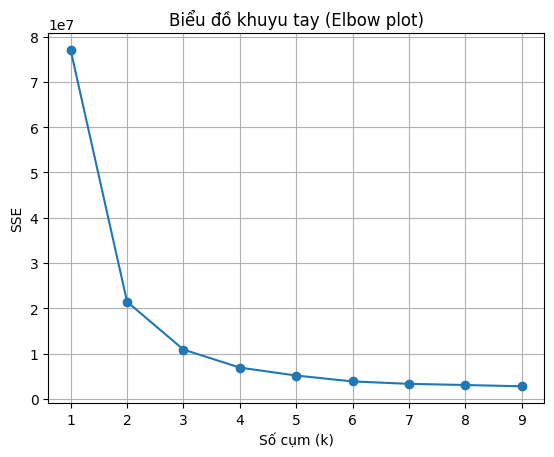

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln1)
    sse_values.append(kmeans.inertia_)

#  Vẽ biểu đồ khuyu tay
plt.plot(range(1, 10), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuyu tay (Elbow plot)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()


Nhìn vào biểu đồ ta thấy giá trị SSE giảm mạnh khi có số cụm là 1 -> 4 và bắt đầu giảm ít lại kh quá nhiều khi từ cụm 6 trở lên nên ta sẽ chọn k = 6 để phân cụm

Tiến hành gom cụm K-Mean

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_bln1[['Net Worth','Age', 'Country', 'Source', 'Industries']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

Phân thành các đoạn cụm và xuất cụm đó ra

In [ ]:
labels = kmeans.labels_
df_bln1['Cluster'] = labels
df_bln1[df_bln1['Cluster'] == 0]

,Net Worth,Age,Country,Source,Industries,Cluster
20,36.8,62.0,25,543,3,0
25,28.1,92.0,22,576,13,0
33,21.8,61.0,9,576,13,0
37,20.3,38.0,9,576,13,0
39,19.8,80.0,19,597,4,0
...,...,...,...,...,...,...
2073,1.0,50.0,41,535,16,0
2074,1.0,87.0,20,494,3,0
2082,1.0,53.0,9,576,13,0
2083,1.0,58.0,9,576,13,0


In [ ]:
df_bln1[df_bln1['Cluster'] == 1]

,Net Worth,Age,Country,Source,Industries,Cluster
20,36.8,62.0,25,543,3,1
25,28.1,92.0,22,576,13,1
33,21.8,61.0,9,576,13,1
37,20.3,38.0,9,576,13,1
39,19.8,80.0,19,597,4,1
...,...,...,...,...,...,...
2073,1.0,50.0,41,535,16,1
2074,1.0,87.0,20,494,3,1
2082,1.0,53.0,9,576,13,1
2083,1.0,58.0,9,576,13,1


In [ ]:
df_bln1[df_bln1['Cluster'] == 2]

,Net Worth,Age,Country,Source,Industries,Cluster
16,38.8,55.0,9,287,16,2
34,21.7,91.0,22,280,2,2
41,19.7,71.0,30,320,4,2
51,17.0,62.0,68,280,2,2
56,16.5,40.0,9,287,16,2
...,...,...,...,...,...,...
2072,1.0,59.0,68,242,16,2
2085,1.0,56.0,9,348,2,2
2086,1.0,75.0,9,292,14,2
2088,1.0,45.0,9,287,16,2


In [ ]:
df_bln1[df_bln1['Cluster'] == 3]

,Net Worth,Age,Country,Source,Industries,Cluster
4,59.0,75.00000,68,641,16,3
11,52.1,80.00000,37,679,17,3
22,33.3,64.17885,19,673,4,3
44,18.1,63.00000,52,670,12,3
46,17.4,74.00000,30,624,10,3
...,...,...,...,...,...,...
2066,1.0,41.00000,9,638,16,3
2077,1.0,63.00000,9,652,4,3
2081,1.0,54.00000,9,728,14,3
2089,1.0,65.00000,9,641,16,3


In [ ]:
df_bln1[df_bln1['Cluster'] == 4]

,Net Worth,Age,Country,Source,Industries,Cluster
20,104,37,25,543,3,4
25,89,68,22,576,13,4
33,82,36,9,576,13,4
37,79,13,9,576,13,4
39,67,56,19,597,4,4
...,...,...,...,...,...,...
2073,0,25,41,535,16,4
2074,0,63,20,494,3,4
2082,0,28,9,576,13,4
2083,0,33,9,576,13,4


In [ ]:
df_bln1

,Net Worth,Age,Country,Source,Industries,Cluster
0,113.0,56.0,68,4,16,5
1,98.0,64.0,68,75,16,5
2,76.0,71.0,17,69,4,5
3,67.5,89.0,68,9,5,5
4,59.0,75.0,68,641,16,0
...,...,...,...,...,...,...
2090,1.0,54.0,9,363,10,2
2091,1.0,55.0,9,148,4,1
2092,1.0,45.0,9,641,16,0
2093,1.0,46.0,65,463,12,2


Biểu đồ quan hệ giữa các cột

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


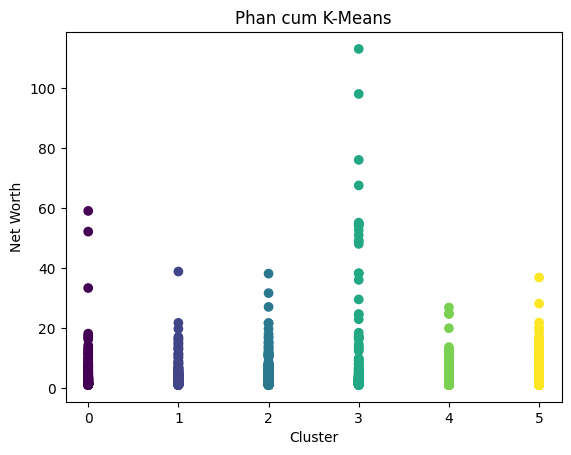

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln1)

df_bln1['Cluster'] = kmeans.labels_

plt.scatter(df_bln1['Cluster'], df_bln1['Net Worth'], c = df_bln1['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Net Worth')
plt.title('Phan cum K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


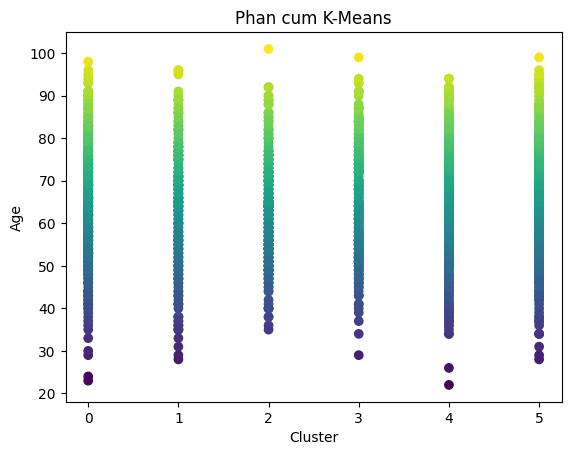

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln1)

df_bln1['Cluster'] = kmeans.labels_

plt.scatter(df_bln1['Cluster'], df_bln1['Age'], c = df_bln1['Age'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.title('Phan cum K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


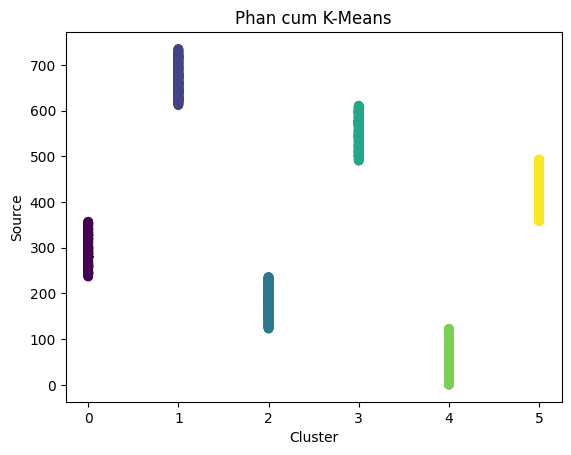

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln1)

df_bln1['Cluster'] = kmeans.labels_

plt.scatter(df_bln1['Cluster'], df_bln1['Source'], c = df_bln1['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Source')
plt.title('Phan cum K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


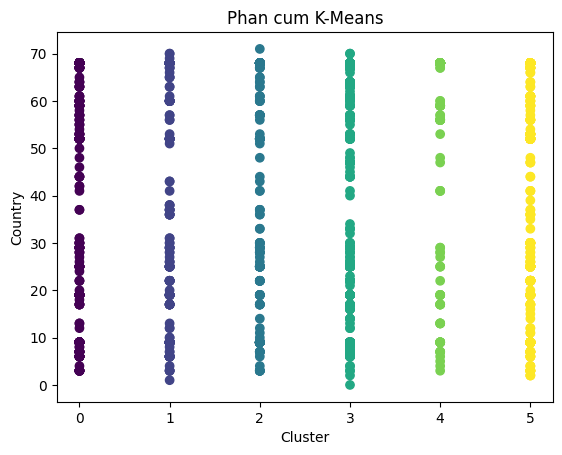

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln1)

df_bln1['Cluster'] = kmeans.labels_

plt.scatter(df_bln1['Cluster'], df_bln1['Country'], c = df_bln1['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.title('Phan cum K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


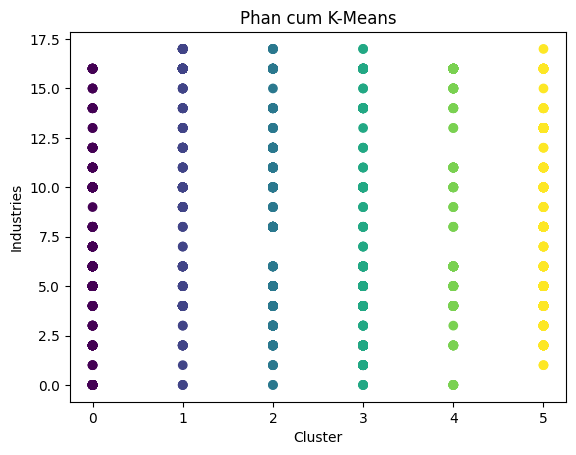

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln1)

df_bln1['Cluster'] = kmeans.labels_

plt.scatter(df_bln1['Cluster'], df_bln1['Industries'], c = df_bln1['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Industries')
plt.title('Phan cum K-Means')
plt.show()

Tương tự với các bộ dữ liệu còn lại

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_bln2['Country'] = label_encoder.fit_transform(df_bln2['Country'])
df_bln2['Source'] = label_encoder.fit_transform(df_bln2['Source'])
df_bln2['Industries'] = label_encoder.fit_transform(df_bln2['Industries'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

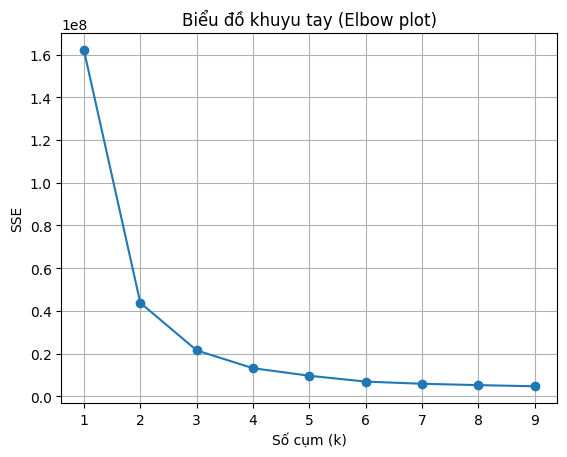

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln2)
    sse_values.append(kmeans.inertia_)

# Vẽ biểu đồ khuyu tay
plt.plot(range(1, 10), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuyu tay (Elbow plot)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

Nhìn vào biểu đồ ta thấy giá trị SSE giảm mạnh khi có số cụm là 1 -> 4 và bắt đầu giảm ít lại kh quá nhiều khi từ cụm 5 trở lên nên ta sẽ chọn k = 5 để phân cụm

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_bln2[['Net Worth', 'Age', 'Source','Country','Industries']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
labels = kmeans.labels_
df_bln2['Cluster'] = labels
df_bln2[df_bln2['Cluster'] == 1]

,Net Worth,Country,Source,Age,Industries,Cluster
9,84.5,24,350,63.0,2,1
20,55.3,8,358,41.0,16,1
25,48.4,8,358,56.0,16,1
30,44.1,29,398,72.0,4,1
35,38.2,66,257,75.0,7,1
...,...,...,...,...,...,...
2729,1.0,28,271,49.0,1,1
2734,1.0,8,358,51.0,16,1
2747,1.0,8,358,46.0,16,1
2750,1.0,8,358,49.0,16,1


In [ ]:
df_bln2[df_bln2['Cluster'] == 2]

,Net Worth,Country,Source,Age,Industries,Cluster
0,177.0,66,6,57.0,16,2
1,151.0,66,143,49.0,0,2
2,150.0,16,86,72.0,4,2
3,124.0,66,96,65.0,16,2
4,97.0,66,48,36.0,16,2
...,...,...,...,...,...,...
2742,1.0,66,128,85.0,2,2
2743,1.0,66,25,88.0,5,2
2748,1.0,51,93,81.0,10,2
2751,1.0,8,50,65.0,10,2


In [ ]:
df_bln2[df_bln2['Cluster'] == 3]

In [ ]:
df_bln2[df_bln2['Cluster'] == 4]

In [ ]:
df_bln2[df_bln2['Cluster'] == 0]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_bln3['Country'] = label_encoder.fit_transform(df_bln3['Country'])
df_bln3['Source'] = label_encoder.fit_transform(df_bln3['Source'])
df_bln3['Industries'] = label_encoder.fit_transform(df_bln3['Industries'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

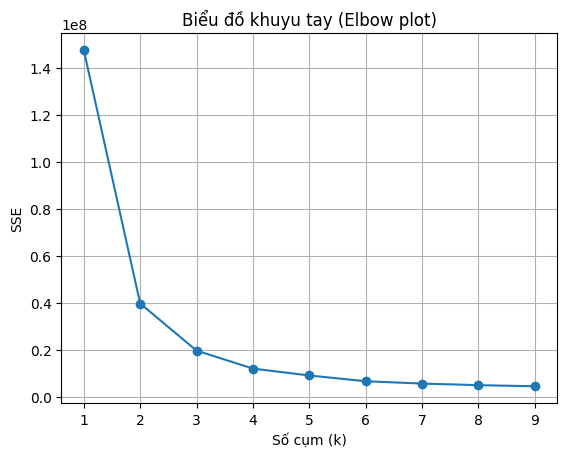

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
sse_values = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_bln3)
    sse_values.append(kmeans.inertia_)

# Vẽ biểu đồ khuyu tay
plt.plot(range(1, 10), sse_values, marker='o')
plt.xlabel('Số cụm (k)')
plt.ylabel('SSE')
plt.title('Biểu đồ khuyu tay (Elbow plot)')
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()

Nhìn vào biểu đồ ta thấy giá trị SSE giảm mạnh khi có số cụm là 1 -> 5 và bắt đầu giảm ít lại kh quá nhiều khi từ cụm 6 trở lên nên ta sẽ chọn k = 6 để phân cụm

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df_bln3[['Net Worth', 'Age', 'Country','Source','Industries']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
labels = kmeans.labels_
df_bln3['Cluster'] = labels
df_bln3[df_bln3['Cluster'] == 1]

,Net Worth,Age,Country,Source,Industries,Cluster
16,65.7,67,11,212,6,1
28,44.8,53,25,201,0,1
40,31.7,82,70,235,6,1
41,31.7,86,70,235,6,1
49,27.5,76,70,242,7,1
...,...,...,...,...,...,...
2563,1.1,57,11,201,10,1
2574,1.1,57,11,220,8,1
2587,1.0,41,2,233,16,1
2596,1.0,82,49,170,4,1


In [ ]:
df_bln3[df_bln3['Cluster'] == 2]

In [ ]:
df_bln3[df_bln3['Cluster'] == 3]

In [ ]:
df_bln3[df_bln3['Cluster'] == 4]

In [ ]:
df_bln3[df_bln3['Cluster'] == 5]

In [ ]:
df_bln3[df_bln3['Cluster'] == 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Net Worth,Age,Country,Source,Industries,Cluster
10,90.0,59,28,494,2,0
25,49.2,64,9,546,11,0
31,40.4,85,20,533,4,0
33,37.2,50,11,501,16,0
37,34.8,75,70,509,5,0
...,...,...,...,...,...,...
2579,1.0,42,22,560,8,0
2580,1.0,39,22,560,8,0
2586,1.0,69,25,538,10,0
2592,1.0,58,69,585,17,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


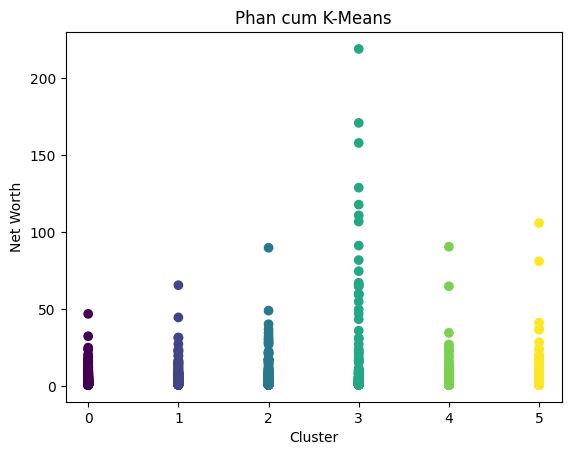

In [ ]:
kmean = KMeans(n_clusters = 6, random_state=42)
kmeans.fit(df_bln3)

df_bln3['Cluster'] = kmeans.labels_

plt.scatter(df_bln3['Cluster'], df_bln3['Net Worth'], c = df_bln3['Cluster'], cmap = 'viridis')
plt.xlabel('Cluster')
plt.ylabel('Net Worth')
plt.title('Phan cum K-Means')
plt.show()

# Gom cụm bằng phương pháp phân cấp

Bộ dữ liệu 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(df_bln1, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=list(range(len(df_bln1))), leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

ValueError: ignored

Bộ dữ liệu 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(df_bln2, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=list(range(len(df_bln2))), leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Bộ dữ liệu 3

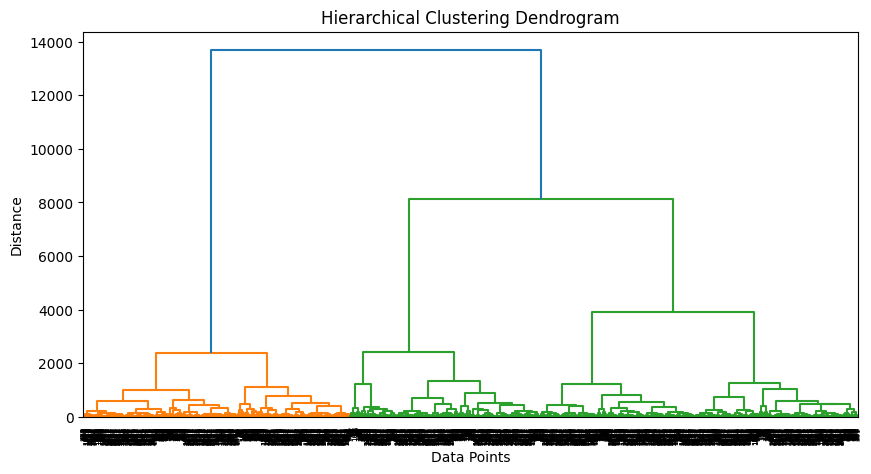

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(df_bln3, method='ward')

# Vẽ dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=list(range(len(df_bln3))), leaf_rotation=90)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.cluster.hierarchy import linkage, dendrogram
# linkage_matrix = linkage(df_bln4, method='ward')

# # Vẽ dendrogram
# plt.figure(figsize=(10, 5))
# dendrogram(linkage_matrix, labels=list(range(len(df_bln4))), leaf_rotation=90)
# plt.xlabel('Data Points')
# plt.ylabel('Distance')
# plt.title('Hierarchical Clustering Dendrogram')
# plt.show()

In [ ]:
num_clusters = 2  # Số lượng cụm muốn gom
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(df_bln1)

# Lấy thông tin về các centroid và nhãn cụm của từng điểm dữ liệu
centroids = kmeans.cluster_centers_
labels1 = kmeans.labels_

# In kết quả gom cụm
df_bln1['Cluster1'] = labels1
df_bln1[df_bln1['Cluster1'] == 1]

# **KNN**

Bộ dữ liệu 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_1 = df_bln1.drop('Cluster', axis=1)  # Features
y_1 = df_bln1['Cluster']  # Target variable

#Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=1)

#Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_1 = KNeighborsClassifier(n_neighbors=3)
knn_5_1 = KNeighborsClassifier(n_neighbors=5)
knn_7_1 = KNeighborsClassifier(n_neighbors=7)
knn_9_1 = KNeighborsClassifier(n_neighbors=9)
knn_11_1 = KNeighborsClassifier(n_neighbors=11)

knn_3_1.fit(X_train_1, y_train_1)
knn_5_1.fit(X_train_1, y_train_1)
knn_7_1.fit(X_train_1, y_train_1)
knn_9_1.fit(X_train_1, y_train_1)
knn_11_1.fit(X_train_1, y_train_1)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Đánh giá mô hình trên tập test
y_pred_3_1 = knn_3_1.predict(X_test_1)
y_pred_5_1 = knn_5_1.predict(X_test_1)
y_pred_7_1 = knn_7_1.predict(X_test_1)
y_pred_9_1= knn_9_1.predict(X_test_1)
y_pred_11_1 = knn_11_1.predict(X_test_1)

In [ ]:
#Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_1 = 1 - accuracy_score(y_train_1, knn_3_1.predict(X_train_1))
test_error_3_1 = 1 - accuracy_score(y_test_1, y_pred_3_1)

train_error_5_1 = 1 - accuracy_score(y_train_1, knn_5_1.predict(X_train_1))
test_error_5_1 = 1 - accuracy_score(y_test_1, y_pred_5_1)

train_error_7_1 = 1 - accuracy_score(y_train_1, knn_7_1.predict(X_train_1))
test_error_7_1 = 1 - accuracy_score(y_test_1, y_pred_7_1)

train_error_9_1 = 1 - accuracy_score(y_train_1, knn_9_1.predict(X_train_1))
test_error_9_1 = 1 - accuracy_score(y_test_1, y_pred_9_1)

train_error_11_1 = 1 - accuracy_score(y_train_1, knn_11_1.predict(X_train_1))
test_error_11_1 = 1 - accuracy_score(y_test_1, y_pred_11_1)

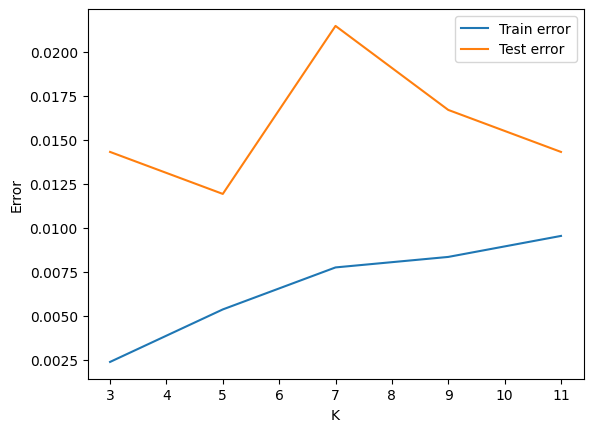

,K,Train Error,Test Error
0,3,0.002387,0.014320
1,5,0.005370,0.011933
2,7,0.007757,0.021480
3,9,0.008353,0.016706
4,11,0.009547,0.014320


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_1 = [train_error_3_1, train_error_5_1, train_error_7_1, train_error_9_1, train_error_11_1]
test_errors_1= [test_error_3_1, test_error_5_1, test_error_7_1, test_error_9_1, test_error_11_1]

#Tạo DataFrame từ các list trên
df_demo_1 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_1,
                        'Test Error': test_errors_1})

#Xuất DataFrame ra file .csv
df_demo_1

Bộ dữ liệu 2

In [ ]:
df_bln2

,Net Worth,Country,Source,Age,Industries,Cluster
0,177.0,66,6,57.0,16,2
1,151.0,66,143,49.0,0,2
2,150.0,16,86,72.0,4,2
3,124.0,66,96,65.0,16,2
4,97.0,66,48,36.0,16,2
...,...,...,...,...,...,...
2750,1.0,8,358,49.0,16,1
2751,1.0,8,50,65.0,10,2
2752,1.0,8,449,58.0,12,4
2753,1.0,8,306,58.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_2 = df_bln2.drop('Cluster', axis=1)  # Features
y_2 = df_bln2['Cluster']  # Target variable

#Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=1)

#Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_2 = KNeighborsClassifier(n_neighbors=3)
knn_5_2 = KNeighborsClassifier(n_neighbors=5)
knn_7_2 = KNeighborsClassifier(n_neighbors=7)
knn_9_2 = KNeighborsClassifier(n_neighbors=9)
knn_11_2 = KNeighborsClassifier(n_neighbors=11)

knn_3_2.fit(X_train_2, y_train_2)
knn_5_2.fit(X_train_2, y_train_2)
knn_7_2.fit(X_train_2, y_train_2)
knn_9_2.fit(X_train_2, y_train_2)
knn_11_2.fit(X_train_2, y_train_2)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Đánh giá mô hình trên tập test
y_pred_3_2 = knn_3_2.predict(X_test_2)
y_pred_5_2 = knn_5_2.predict(X_test_2)
y_pred_7_2 = knn_7_2.predict(X_test_2)
y_pred_9_2 = knn_9_2.predict(X_test_2)
y_pred_11_2 = knn_11_2.predict(X_test_2)

In [ ]:
#Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_2 = 1 - accuracy_score(y_train_2, knn_3_2.predict(X_train_2))
test_error_3_2 = 1 - accuracy_score(y_test_2, y_pred_3_2)

train_error_5_2 = 1 - accuracy_score(y_train_2, knn_5_2.predict(X_train_2))
test_error_5_2 = 1 - accuracy_score(y_test_2, y_pred_5_2)

train_error_7_2 = 1 - accuracy_score(y_train_2, knn_7_2.predict(X_train_2))
test_error_7_2 = 1 - accuracy_score(y_test_2, y_pred_7_2)

train_error_9_2 = 1 - accuracy_score(y_train_2, knn_9_2.predict(X_train_2))
test_error_9_2 = 1 - accuracy_score(y_test_2, y_pred_9_2)

train_error_11_2 = 1 - accuracy_score(y_train_2, knn_11_2.predict(X_train_2))
test_error_11_2 = 1 - accuracy_score(y_test_2, y_pred_11_2)

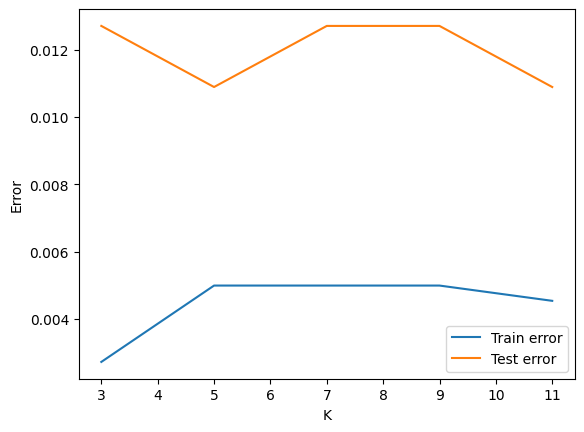

,K,Train Error,Test Error
0,3,0.002722,0.012704
1,5,0.004991,0.010889
2,7,0.004991,0.012704
3,9,0.004991,0.012704
4,11,0.004537,0.010889


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_2, train_error_5_2, train_error_7_2, train_error_9_2, train_error_11_2], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_2, test_error_5_2, test_error_7_2, test_error_9_2, test_error_11_2], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_2 = [train_error_3_2, train_error_5_2, train_error_7_2, train_error_9_2, train_error_11_2]
test_errors_2 = [test_error_3_2, test_error_5_2, test_error_7_2, test_error_9_2, test_error_11_2]

#Tạo DataFrame từ các list trên
df_demo_2 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_2,
                        'Test Error': test_errors_2})

#Xuất DataFrame ra file .csv
df_demo_2

Bộ 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


X_3 = df_bln3.drop('Cluster', axis=1)  # Features
y_3 = df_bln3['Cluster']  # Target variable

#Chia tập dữ liệu thành tập train(80%) và tập test(20%)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=1)

#Xây dựng mô hình KNN với K lần lượt là 3, 5, 7, 9 trên tập train
from sklearn.neighbors import KNeighborsClassifier

knn_3_3 = KNeighborsClassifier(n_neighbors=3)
knn_5_3 = KNeighborsClassifier(n_neighbors=5)
knn_7_3 = KNeighborsClassifier(n_neighbors=7)
knn_9_3 = KNeighborsClassifier(n_neighbors=9)
knn_11_3 = KNeighborsClassifier(n_neighbors=11)

knn_3_3.fit(X_train_3, y_train_3)
knn_5_3.fit(X_train_3, y_train_3)
knn_7_3.fit(X_train_3, y_train_3)
knn_9_3.fit(X_train_3, y_train_3)
knn_11_3.fit(X_train_3, y_train_3)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
#Đánh giá mô hình trên tập test
y_pred_3_3 = knn_3_3.predict(X_test_3)
y_pred_5_3 = knn_5_3.predict(X_test_3)
y_pred_7_3 = knn_7_3.predict(X_test_3)
y_pred_9_3 = knn_9_3.predict(X_test_3)
y_pred_11_3 = knn_11_3.predict(X_test_3)

In [ ]:
#Tính toán sai số trên tập train và test
from sklearn.metrics import accuracy_score

train_error_3_3 = 1 - accuracy_score(y_train_3, knn_3_3.predict(X_train_3))
test_error_3_3 = 1 - accuracy_score(y_test_3, y_pred_3_3)

train_error_5_3 = 1 - accuracy_score(y_train_3, knn_5_3.predict(X_train_3))
test_error_5_3 = 1 - accuracy_score(y_test_3, y_pred_5_3)

train_error_7_3 = 1 - accuracy_score(y_train_3, knn_7_3.predict(X_train_3))
test_error_7_3 = 1 - accuracy_score(y_test_3, y_pred_7_3)

train_error_9_3 = 1 - accuracy_score(y_train_3, knn_9_3.predict(X_train_3))
test_error_9_3 = 1 - accuracy_score(y_test_3, y_pred_9_3)

train_error_11_3 = 1 - accuracy_score(y_train_3, knn_11_3.predict(X_train_3))
test_error_11_3 = 1 - accuracy_score(y_test_3, y_pred_11_3)

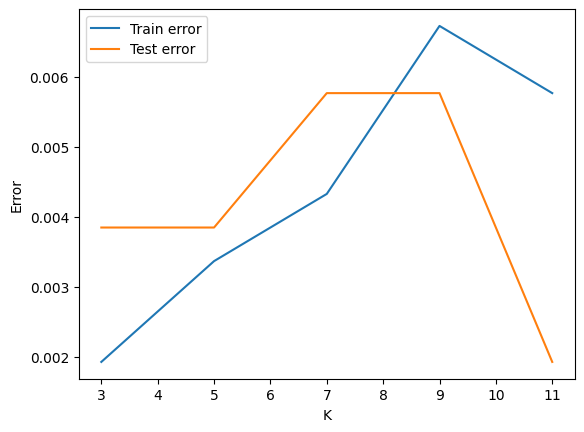

,K,Train Error,Test Error
0,3,0.001923,0.003846
1,5,0.003365,0.003846
2,7,0.004327,0.005769
3,9,0.006731,0.005769
4,11,0.005769,0.001923


In [ ]:
#Vẽ đồ thị sai số
import matplotlib.pyplot as plt

plt.plot([3, 5, 7, 9, 11], [train_error_3_3, train_error_5_3, train_error_7_3, train_error_9_3, train_error_11_3], label='Train error')
plt.plot([3, 5, 7, 9, 11], [test_error_3_3, test_error_5_3, test_error_7_3, test_error_9_3, test_error_11_3], label='Test error')

plt.xlabel('K')
plt.ylabel('Error')
plt.legend()

plt.show()

#Xuất thành dạng bảng
K_value = [3, 5, 7, 9, 11]
train_errors_3 = [train_error_3_3, train_error_5_3, train_error_7_3, train_error_9_3, train_error_11_3]
test_errors_3 = [test_error_3_3, test_error_5_3, test_error_7_3, test_error_9_3, test_error_11_3]

#Tạo DataFrame từ các list trên
df_demo_3 = pd.DataFrame({'K': K_value,
                        'Train Error': train_errors_3,
                        'Test Error': test_errors_3})

#Xuất DataFrame ra file .csv
df_demo_3

# **ARM**

**2020**

In [ ]:
df_bln1

,Net Worth,Age,Country,Source,Industries,Cluster
0,113.0,56.0,68,4,16,4
1,98.0,64.0,68,75,16,4
2,76.0,71.0,17,69,4,4
3,67.5,89.0,68,9,5,4
4,59.0,75.0,68,641,16,1
...,...,...,...,...,...,...
2090,1.0,54.0,9,363,10,2
2091,1.0,55.0,9,148,4,0
2092,1.0,45.0,9,641,16,1
2093,1.0,46.0,65,463,12,2


In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder = pd.get_dummies(df_bln1, columns = ['Country', 'Industries'])

one_hot_encoder['Net Worth'] = one_hot_encoder['Net Worth'].apply(lambda x:1 if x>20 else 0)
one_hot_encoder['Age'] = one_hot_encoder['Age'].apply(lambda x:1 if x<30 else 0)

one_hot_encoder.drop(columns=['Source', 'Cluster'], inplace = True)

one_hot_encoder

,Net Worth,Age,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,...,Industries_8,Industries_9,Industries_10,Industries_11,Industries_12,Industries_13,Industries_14,Industries_15,Industries_16,Industries_17
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data_encoded = one_hot_encoder.applymap(lambda x:True if x == 1 else False)

frequent_itemsets = apriori(data_encoded, min_support = 0.035, use_colnames = True)

rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.5)

print(rules)

rules.to_excel("/content/drive/MyDrive/Learn/Data Mining/Billionaires_rules_2020.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      antecedents   consequents  antecedent support  consequent support  \
0  (Industries_5)  (Country_68)            0.142243            0.293079   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.076372    0.536913  1.831974  0.034684     1.52654       0.529452  


**2021**

In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder2 = pd.get_dummies(df_bln2, columns = ['Country', 'Industries'])

one_hot_encoder2['Net Worth'] = one_hot_encoder2['Net Worth'].apply(lambda x:1 if x>20 else 0)
one_hot_encoder2['Age'] = one_hot_encoder2['Age'].apply(lambda x:1 if x<30 else 0)

one_hot_encoder2.drop(columns=['Source', 'Cluster'], inplace = True)

one_hot_encoder2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Net Worth,Age,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,...,Industries_8,Industries_9,Industries_10,Industries_11,Industries_12,Industries_13,Industries_14,Industries_15,Industries_16,Industries_17
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2751,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded2 = one_hot_encoder2.applymap(lambda x:True if x == 1 else False)

frequent_itemsets2 = apriori(data_encoded2, min_support = 0.035, use_colnames = True)

rules2 = association_rules(frequent_itemsets2, metric = "confidence", min_threshold = 0.5)

print(rules2)

rules2.to_excel("/content/drive/MyDrive/Learn/Data Mining/Billionaires_rules_2021.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      antecedents   consequents  antecedent support  consequent support  \
0  (Industries_5)  (Country_66)            0.134664            0.262795   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.068603    0.509434  1.938523  0.033213    1.502764       0.559486  


**2022**

In [ ]:
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules

one_hot_encoder3 = pd.get_dummies(df_bln3, columns = ['Country', 'Industries'])

one_hot_encoder3['Net Worth'] = one_hot_encoder3['Net Worth'].apply(lambda x:1 if x>20 else 0)
one_hot_encoder3['Age'] = one_hot_encoder3['Age'].apply(lambda x:1 if x<30 else 0)

one_hot_encoder3.drop(columns=['Source', 'Cluster'], inplace = True)

one_hot_encoder3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Net Worth,Age,Country_0,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,...,Industries_8,Industries_9,Industries_10,Industries_11,Industries_12,Industries_13,Industries_14,Industries_15,Industries_16,Industries_17
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_encoded3 = one_hot_encoder3.applymap(lambda x:True if x == 1 else False)

frequent_itemsets3 = apriori(data_encoded3, min_support = 0.035, use_colnames = True)

rules3 = association_rules(frequent_itemsets3, metric = "confidence", min_threshold = 0.5)

print(rules3)

rules3.to_excel("/content/drive/MyDrive/Learn/Data Mining/Billionaires_rules_2022.xlsx")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      antecedents   consequents  antecedent support  consequent support  \
0  (Industries_5)  (Country_70)            0.148462            0.276538   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.074231         0.5  1.808067  0.033175    1.446923       0.524842  


# Cây quyết định


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Chọn các cột đặc trưng và label
ftr1 = df_bln1[["Net Worth",	"Age", "Country", "Industries"]]

labels1 = df_bln1["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr1 = pd.get_dummies(ftr1)

# Tách dữ liệu thành tập train, test
train_ftr1, test_ftr1, train_labels1, test_labels1 = train_test_split(ftr1, labels1, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid1 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf1 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search1 = GridSearchCV(clf1, param_grid1, cv = 5, scoring = 'accuracy')
grid_search1.fit(train_ftr1, train_labels1)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf1 = grid_search1.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search1.best_params_)
print("Best Accuracy: ", grid_search1.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str1 = list(map(str, best_clf1.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt1 = export_graphviz(best_clf1, out_file=None, feature_names=list(train_ftr1.columns),
                         class_names=class_names_str1, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt1)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2020', format='png', cleanup=True)
graph.view()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.4492981520966596


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2020.pdf'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

# Chọn các cột đặc trưng và label
ftr2 = df_bln2[["Net Worth",	"Age", "Country", "Industries"]]

labels2 = df_bln2["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr2 = pd.get_dummies(ftr2)

# Tách dữ liệu thành tập train, test
train_ftr2, test_ftr2, train_labels2, test_labels2 = train_test_split(ftr2, labels2, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf2 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search2 = GridSearchCV(clf2, param_grid2, cv = 5, scoring = 'accuracy')
grid_search2.fit(train_ftr2, train_labels2)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf2 = grid_search2.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search2.best_params_)
print("Best Accuracy: ", grid_search2.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str2 = list(map(str, best_clf2.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt2 = export_graphviz(best_clf2, out_file=None, feature_names=list(train_ftr2.columns),
                         class_names=class_names_str2, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt2)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2021', format='png', cleanup=True)
graph.view()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.46006802721088436


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2021.pdf'

In [ ]:
df_bln3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Net Worth,Age,Country,Source,Industries,Cluster
0,219.0,50,70,123,0,2
1,171.0,58,70,5,16,2
2,158.0,73,20,73,4,2
3,129.0,66,70,81,16,2
4,118.0,91,70,11,5,2
...,...,...,...,...,...,...
2595,1.0,80,59,675,8,5
2596,1.0,82,49,170,4,4
2597,1.0,71,49,170,4,4
2598,1.0,68,49,431,4,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz


# Chọn các cột đặc trưng và label
ftr3 = df_bln3[["Net Worth",	"Age"	,"Country", "Industries"]]

labels3 = df_bln3["Cluster"]

# Chuyển đổi các cột dữ liệu: text to num
ftr3 = pd.get_dummies(ftr3)

# Tách dữ liệu thành tập train, test
train_ftr3, test_ftr3, train_labels3, test_labels3 = train_test_split(ftr3, labels3, test_size=0.2, random_state=42)

# Xây dựng mô hình Cây quyết định
param_grid3 = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

# Tạo mô hình cây quyết định
clf3 = DecisionTreeClassifier()

#Sử dụng GridSearchCV để thử nghiệm các tham số và lựa chọn mô hình tốt nhất
grid_search3 = GridSearchCV(clf3, param_grid3, cv = 5, scoring = 'accuracy')
grid_search3.fit(train_ftr3, train_labels3)

# Lựa chọn mô hình tốt nhất sau khi thử nghiệm
best_clf3 = grid_search3.best_estimator_

# In ra các thông số tốt nhất của mô hình
print("Best Param: ", grid_search3.best_params_)
print("Best Accuracy: ", grid_search3.best_score_)


# Chuyển đổi nhãn lớp thành chuỗi
class_names_str3 = list(map(str, best_clf3.classes_))

# Tạo biểu diễn đồ thị cho cây quyết định
dot_dt3 = export_graphviz(best_clf3, out_file=None, feature_names=list(train_ftr3.columns),
                         class_names=class_names_str3, filled=True, rounded=True,
                         special_characters=True)

# Hiển thị đồ thị
graph = graphviz.Source(dot_dt3)
graph.render(filename='/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2022', format='png', cleanup=True)
graph.view()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Param:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy:  0.4475961538461538


'/content/drive/MyDrive/Forbes Billionaires n Companies/Forbes Billionaires n Companies/forbes companies/FB-2022.pdf'